In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import glob
from scipy.spatial import ConvexHull
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os

In [2]:
import pandas as pd
import glob

# set paths to folders containing CSV files
path = "../Data_Challenge_PHM2022_training_data/Data_Challenge_PHM2022_training_data/"

# combine data_po files into df1
files_po = glob.glob(path + "*data_po*.csv")
df1 = pd.DataFrame()
for file in files_po:
    with open(file, 'r') as f:
        csv_string = f.read()

        data = csv_string
        df = pd.DataFrame([x.split(',') for x in data.split('\n')])
        df.drop(df.tail(1).index,inplace=True)

        temp_df = df.iloc[:, :500]
        df1 = pd.concat([df1, temp_df], axis=0)

# rename the columns in df1 and convert to float
df1.columns = [i for i in range(df1.shape[1])]
df1 = df1.rename(columns={0: 'Fault'})
df1 = df1.astype(float)

# combine data_pdmp files into df2
files_pdmp = glob.glob(path + "*data_pdmp*.csv")
df2 = pd.DataFrame()
for file in files_pdmp:
    with open(file, 'r') as f:

        csv_string = f.read()

        data = csv_string
        df = pd.DataFrame([x.split(',') for x in data.split('\n')])
        df.drop(df.tail(1).index,inplace=True)

        temp_df = df.iloc[:, :500]
        df2 = pd.concat([df2, temp_df], axis=0)

# rename the columns in df2 and convert to float
df2.columns = [i for i in range(df2.shape[1])]
df2 = df2.rename(columns={0: 'Fault'})
df2 = df2.astype(float)

# combine data_pin files into df3
files_pin = glob.glob(path + "*data_pin*.csv")
df3 = pd.DataFrame()
for file in files_pin:
    with open(file, 'r') as f:

        csv_string = f.read()

        data = csv_string
        df = pd.DataFrame([x.split(',') for x in data.split('\n')])
        df.drop(df.tail(1).index,inplace=True)

        temp_df = df.iloc[:, :500]
        df3 = pd.concat([df3, temp_df], axis=0)

# rename the columns in df3 and convert to float
df3.columns = [i for i in range(df3.shape[1])]
df3 = df3.rename(columns={0: 'Fault'})
df3 = df3.astype(float)


In [3]:
# # set paths to folders containing CSV files
# path1 = "../Data_Challenge_PHM2022_training_data/Data_Challenge_PHM2022_training_data/data_po1.csv"
# path2 = "../Data_Challenge_PHM2022_training_data/Data_Challenge_PHM2022_training_data/data_pdmp1.csv"
# path3 = "../Data_Challenge_PHM2022_training_data/Data_Challenge_PHM2022_training_data/data_pin1.csv"

# all_files = [path1, path2, path3]
# dfs = []

# for filename in all_files:
#     with open(filename, 'r') as f:
#         csv_string = f.read()

#     data = csv_string
#     df = pd.DataFrame([x.split(',') for x in data.split('\n')])
#     df.drop(df.tail(1).index,inplace=True)
#     dfs.append(df)

# df_combined1, df_combined2, df_combined3 = dfs[0], dfs[1], dfs[2]

# # process dataframe 1
# df1 = df_combined1.rename(columns={0: 'Fault'})
# df1 = df1.astype(float)

# mincol1 = df1.count(axis=1)
# min_elements1 = mincol1.min()
# df1 = df1.iloc[:, :min_elements1]

# # process dataframe 2
# df2 = df_combined2.rename(columns={0: 'Fault'})
# df2 = df2.astype(float)

# mincol2 = df2.count(axis=1)
# min_elements2 = mincol2.min()
# df2 = df2.iloc[:, :min_elements2]

# # process dataframe 3
# df3 = df_combined3.rename(columns={0: 'Fault'})
# df3 = df3.astype(float)

# mincol3 = df3.count(axis=1)
# min_elements3 = mincol3.min()
# df3 = df3.iloc[:, :min_elements3]

In [4]:
# Assign Fault label to new df y_true

y_true1 = df1["Fault"]
y_true2 = df2["Fault"]
y_true3 = df3["Fault"]

In [5]:
# del fault label column 

df1.columns = df1.columns.astype(str)
del df1[df1.columns[0]]

df2.columns = df2.columns.astype(str)
del df2[df2.columns[0]]

df3.columns = df3.columns.astype(str)
del df3[df3.columns[0]]

In [6]:
# Perform PCA on the data

pca1 = PCA(n_components=2)
principal_components1 = pca1.fit_transform(df1)

pca2 = PCA(n_components=2)
principal_components2 = pca2.fit_transform(df2)

pca3 = PCA(n_components=2)
principal_components3 = pca3.fit_transform(df3)

In [7]:
# Create a DataFrame df_pca with the principal components and cluster labels

df_pca1 = pd.DataFrame(data=principal_components1, columns=['PC1', 'PC2'], index=df1.index)

df_pca2 = pd.DataFrame(data=principal_components2, columns=['PC1', 'PC2'], index=df2.index)

df_pca3 = pd.DataFrame(data=principal_components3, columns=['PC1', 'PC2'], index=df3.index)

c:\Python\Python 3.9.13\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python\Python 3.9.13\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python\Python 3.9.13\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


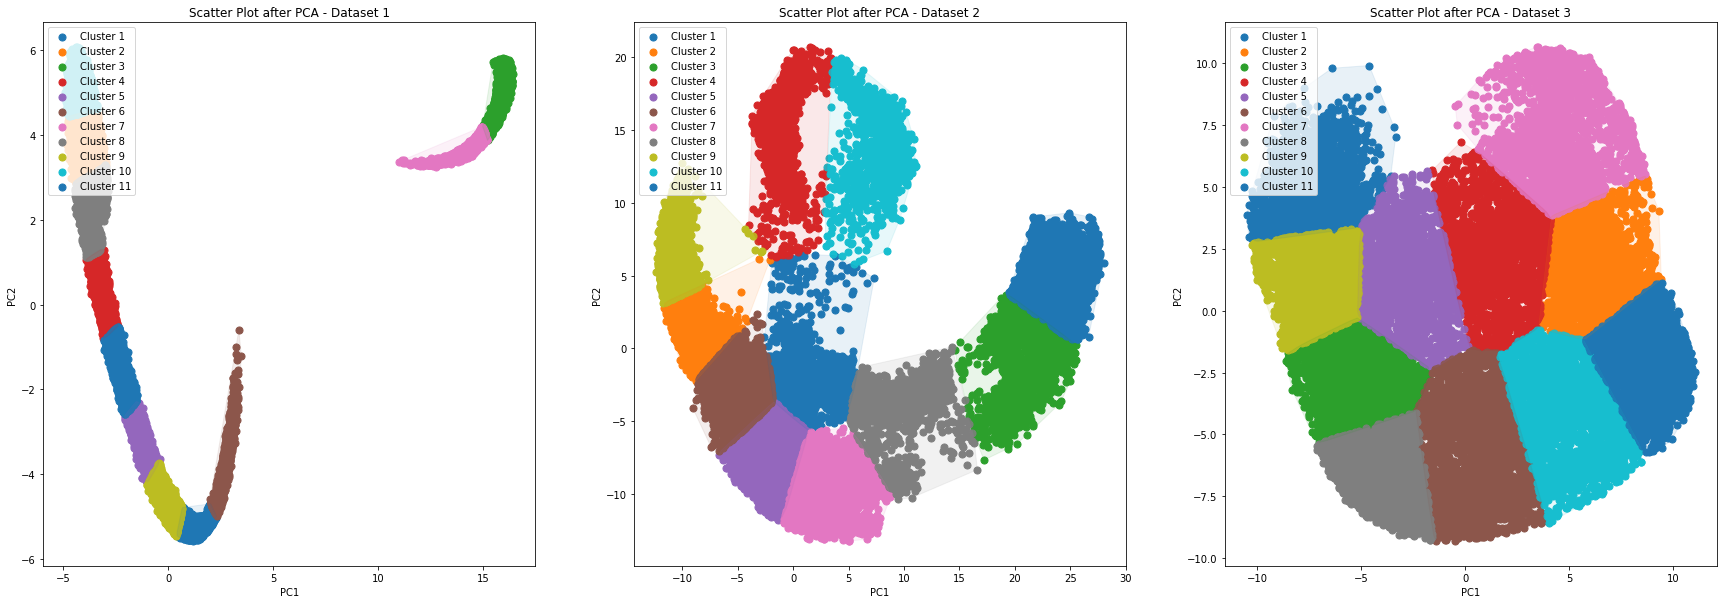

In [8]:
def plot_clusters(df_list, num_clusters=11):
    # Create a list of unique colors for each cluster
    colors = sns.color_palette('tab10', num_clusters)

    fig, axs = plt.subplots(1, len(df_list), figsize=(10*len(df_list), 10))

    # Create a separate scatter plot for each dataframe
    for j, df in enumerate(df_list):
        kmeans = KMeans(n_clusters=num_clusters)
        kmeans.fit(df[['PC1', 'PC2']])
        df['cluster'] = kmeans.labels_
        ax = axs[j]
        for i in range(num_clusters):
            ax.scatter(df.loc[df['cluster']==i, 'PC1'], df.loc[df['cluster']==i, 'PC2'], color=colors[i], s=50, label=f'Cluster {i+1}')
        ax.set_title(f'Scatter Plot after PCA - Dataset {j+1}')
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.legend(loc='upper left')

        # Draw convex hulls
        for i in range(num_clusters):
            cluster_points = df.loc[df['cluster']==i, ['PC1', 'PC2']]
            hull = ConvexHull(cluster_points)
            ax.fill(cluster_points.iloc[hull.vertices, 0], cluster_points.iloc[hull.vertices, 1], color=colors[i], alpha=0.1)

    plt.show()

# Example usage with three dataframes df1, df2, df3:
plot_clusters([df_pca1, df_pca2, df_pca3], num_clusters=11)

In [9]:
# create a crosstab of true labels and cluster assignments
label_cluster_map = pd.crosstab(y_true1, df_pca1["cluster"])

# print the mapping
print(label_cluster_map)

#This will display a heatmap where each row represents a true label and each column represents a cluster.

cluster   0    1     2    3    4    5     6    7    8     9    10
Fault                                                            
1.0      500  289     0  232  341  155     0  238  469   549  250
2.0        0    0  2352    0    0    0  1140    0    0     0    0
3.0      153  510     0  281  365    7     0  264  277   869  344
4.0      797  251     0  233  208  540     0  261  291   286  234
5.0      388  317     0  133  411   82     0  181  478   849  235
6.0        2  609     0  247   88    0     0  841   45  1050  176
7.0      869  245     0  339  291  480     0  231  464    11  224
8.0      670  294     0  229  388  415     0  195  349   264  315
9.0      514  211     0  239  270  136     0  217  426   822  222
10.0     545  344     0  248  194  254     0  317  279   282  228
11.0     723  362     0  223  215  250     0  205  440   583  205


In [10]:
# create a crosstab of true labels and cluster assignments
label_cluster_map = pd.crosstab(y_true2, df_pca2["cluster"])

# print the mapping
print(label_cluster_map)

#This will display a heatmap where each row represents a true label and each column represents a cluster.

cluster   0    1     2     3    4    5    6    7    8     9     10
Fault                                                             
1.0        0  647     0     0  672  745  591    0  368     0     0
2.0       93    2     0  2163    0    0    0    0    6  1228     0
3.0       57  599     0     0  519  666  625  116  488     0     0
4.0      860  172  1046     0    2  502    0  225    0     0   294
5.0        0  637     0     0  756  836  490    0  355     0     0
6.0        0    0   883     0    0    0    0    0    0     0  2175
7.0        1  597     0     0  519  643  422    1  971     0     0
8.0        4  511     0     0  603  302  668   64  967     0     0
9.0      680  618     0     0   76  583    0  859  241     0     0
10.0       1  502     0     0  558  775  483    0  372     0     0
11.0       0  609     0     0  639  873  513    0  572     0     0


In [11]:
# create a crosstab of true labels and cluster assignments
label_cluster_map = pd.crosstab(y_true3, df_pca3["cluster"])

# print the mapping
print(label_cluster_map)

#This will display a heatmap where each row represents a true label and each column represents a cluster.

cluster   0    1    2    3    4    5     6    7    8    9    10
Fault                                                          
1.0      365  282  370  185  200  263    49  330  342  283  354
2.0      725   71    0  420  437    0  1720    0  119    0    0
3.0      161  526  481  161  208  278    15  233  500  257  250
4.0      294  167  227  254  200  241   257  297  527  232  405
5.0      352  287  337  160  183  312    34  423  307  265  414
6.0      125  369  523   28   34  445     0  365  241  464  464
7.0      119  212  278  303  292  153   460  140  537  188  472
8.0       54  433  171  293  285  209   362  185  429  210  488
9.0      394  348  375  195  201  298   109  267  260  282  328
10.0     266  131  246  184  161  238   209  283  266  223  484
11.0     252  493  407  353  380  228   392   30  290  207  174
